## Data Collection: 
Obtain historical stock price data for Apple Inc. from reliable sources such as financial APIs or datasets.In our case we 
used the data from [kaggle](https://www.kaggle.com/datasets/soumendraprasad/stock?select=Apple.csv).
 - What each column of data represents:
 - Open Price at opening time
 - Hight-> Price at closing time
 - Low-> Highest value of that stock on that day
 - Close->  Lowest value of that stock on that day
 - Adj Close-> It helps in getting an idea of the fair value of a stock
 - Volume-> measure of the number of stocks traded over a specified period.
 - Date-> Each Date contains the stock of that company at that date 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

# for offline ploting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import seaborn as sns

In [2]:
df = pd.read_csv("Nabil_Stock.csv")

## Data Preprocessing: 
Clean the raw data, handle missing values, and format the data into a suitable format for analysis.

In [3]:
df.head(5)

,Index,Date,Open,High,Low,Ltp,% change,turnover,Close
0,1,3/27/2024,442,447,440,440.5,-0.29,"13,329,809.20",440.71820
1,2,3/26/2024,445.1,448,440,441.8,-0.72,"17,930,260.10",441.89528
2,3,3/25/2024,458,458,444.4,445,-1.33,"14,908,542.00",451.90860
3,4,3/21/2024,459.9,459.9,449,451,-1.31,"20,947,008.40",453.87531
4,5,3/20/2024,463,465,456,457,-0.65,"14,624,891.10",459.99050


In [4]:
df.describe()

,Index,% change,Close
count,1250.000000,1250.000000,1250.000000
mean,625.500000,0.022784,890.557869
std,360.988227,1.713006,282.373849
min,1.000000,-11.070000,424.002400
25%,313.250000,-0.720000,720.052125
50%,625.500000,-0.120000,826.016000
75%,937.750000,0.497500,1048.271850
max,1250.000000,10.000000,1686.022800


In [5]:
df.isna().sum()

Index       0
Date        0
Open        0
High        0
Low         0
Ltp         0
% change    0
turnover    0
Close       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Index     1250 non-null   int64  
 1   Date      1250 non-null   object 
 2   Open      1250 non-null   object 
 3   High      1250 non-null   object 
 4   Low       1250 non-null   object 
 5   Ltp       1250 non-null   object 
 6   % change  1250 non-null   float64
 7   turnover  1250 non-null   object 
 8   Close     1250 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 88.0+ KB


## In above dataframe column you can see data type of Date Column is Object and we need to convert datetime.

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

# EDA

In [12]:
df.dtypes

Index                int64
Date        datetime64[ns]
Open                object
High                object
Low                 object
Ltp                 object
% change           float64
turnover            object
Close              float64
dtype: object

In [16]:
df['Open'] = df['Open'].astype(float)

In [20]:
df['High'] = df['High'].str.replace(',','').astype(float)

In [21]:
df['Low'] = df['Close'].astype(float)

In [23]:
df['Ltp'] = df['Ltp'].str.replace(',','').astype(float)

In [24]:
df.dtypes

Index                int64
Date        datetime64[ns]
Open               float64
High               float64
Low                float64
Ltp                float64
% change           float64
turnover            object
Close              float64
dtype: object

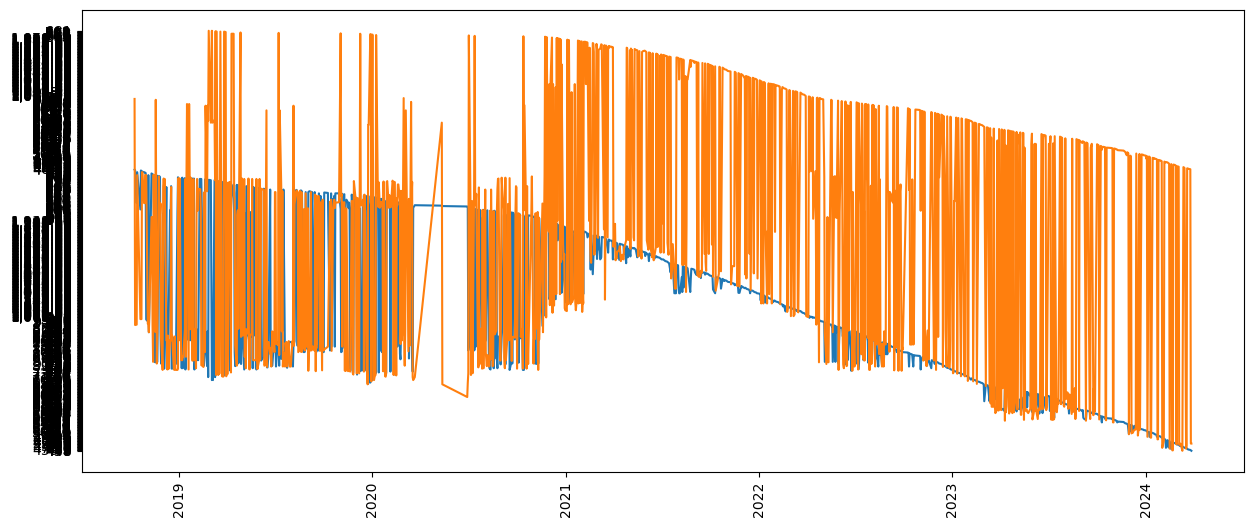

In [8]:
plt.figure(figsize=(15,6))
plt.plot(df['Date'],df['High'])
plt.plot(df['Date'],df['Low'])
plt.xticks(rotation='vertical')
plt.show()